In [20]:
import numpy as np
import pandas as pd 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

In [21]:
IMAGE_WIDTH=150
IMAGE_HEIGHT=200
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [56]:
# 데이터 불러오기
with_mask = os.listdir("./dataset/with_mask")
without_mask = os.listdir("./dataset/without_mask")

with_mask_categories = []
without_mask_categories = []

for mask in with_mask:
    with_mask_categories.append(1)
for no_mask in without_mask:
    without_mask_categories.append(0)
    
with_mask_df = pd.DataFrame({
    'filename': with_mask,
    'category': with_mask_categories
})
without_mask_df = pd.DataFrame({
    'filename': without_mask,
    'category': without_mask_categories
})


df = pd.concat([with_mask_df, without_mask_df])

<class 'list'>


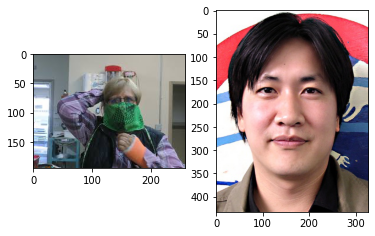

In [30]:
# 데이터 확인하기
sample_1 = random.choice(with_mask)
sample_0 = random.choice(without_mask)

image1 = load_img("./dataset/with_mask/"+sample_1)
image0 = load_img("./dataset/without_mask/"+sample_0)

f = plt.figure()
f.add_subplot(1,2, 1)
plt.imshow(image1)
f.add_subplot(1,2, 2)
plt.imshow(image0)
plt.show(block=True)

In [75]:
# create model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Activation, BatchNormalization

In [17]:
def create_model():
    model = Sequential()
    model.add(Conv2D(32, (3,3), activation='relu', strides=(2,2), input_shape=(IMAGE_WIDTH,IMAGE_HEIGHT,IMAGE_CHANNELS)))
    model.add(Conv2D(64, (3,3), activation='relu',strides=(2,2)))
    model.add(Conv2D(64, (3,3), activation='relu',strides=(2,2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])
    return model

In [18]:
model = create_model()
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 74, 99, 32)        896       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 36, 49, 64)        18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 17, 24, 64)        36928     
_________________________________________________________________
flatten_4 (Flatten)          (None, 26112)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                1671232   
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 1,727,617
Trainable params: 1,727,617
Non-trainable params: 0
____________________________________________

In [77]:
# preprocessing data

import numpy as np

images = []
labels = []

for index, row in with_mask_df.iterrows():
    image = load_img("./dataset/with_mask/" + row['filename'])
    image = np.array(image, dtype = 'float32')
    image = image /255
    images.append(image)
    labels.append(1)
for index, row in without_mask_df.iterrows():
    image = load_img("./dataset/without_mask/" + row['filename'])
    image = np.array(image, dtype = 'float32')
    image = image /255
    images.append(image)
    labels.append(0)
    
df = pd.DataFrame({
    'image': images,
    'label': labels
})

df.head()

,image,label
0,"[[[0.13725491, 0.14901961, 0.16862746], [0.137...",1
1,"[[[0.35686275, 0.27450982, 0.105882354], [0.33...",1
2,"[[[0.9372549, 0.972549, 0.96862745], [0.937254...",1
3,"[[[0.654902, 0.654902, 0.654902], [0.5921569, ...",1
4,"[[[0.015686275, 0.4745098, 0.50980395], [0.015...",1
